<a href="https://colab.research.google.com/github/Prajaktahz/Uni_Colab_Work/blob/main/Additional_Material_Web_Scraping_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nlab.org.uk/wp-content/uploads/nlabmain.png" style="width:40%; clear:both; margin-bottom:-20px" align=left>
<br style="clear:both;"/>

## Digital Marketing- Computer Workshop 1

# Sentiment Analysis
----------
Yang Bong - University of Nottingham
[mail](mailto:yang.bong2@nottingham.ac.uk)
[web](http://www.neodemographics.org)

# **Sentiment Analysis using Python**

In this exercise, we will learn how to perform simple sentiment analysis using the 'TextBlob' library in Python. Sentiment analysis is a method used to evaluate the sentiment or emotion expressed in a piece of text, ranging from negative to positive.




## ** **Additional Material 1: Sentiment Analysis on an Online Article**

1. Install necessary libraries

 First, we need to install the required Python libraries. **TextBlob** is for processing textual data and performing sentiment analysis. **Newspaper3k** is for extracting and parsing articles from URLs. We also need **nltk** for text processing tasks.

In [1]:
# Install necessary libraries.
!pip install newspaper3k
from textblob import TextBlob
from newspaper import Article
import nltk
import pandas as pd
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=2b7f0cd82c3d05311dd7636aa175bc1f7e9491aad1edd81ebcffd66e7d35df4b
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=910f7dd710ddbbb0ffb94d47f559bfea73046fdf90e07045a5522bd60f553fa2
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1b

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Next, we'll run a sentiment analysis on online article to analyze. In this example we will use the news article from a news website.


In [8]:
#Replace the 'url' variable's value with the URL of your choice to analyze a different article.
url = 'https://www.desidime.com/stores/myntra/reviews'

article = Article(url) # Create an Article object with the URL
article.download() # Download the article's data
article.parse()  # Parse the article to extract its text
article.nlp() # Perform natural language processing tasks on the article

Now that we have the text of the article, we can analyze its sentiment.

In this example, we will access the polarity of the article, where the score ranges from -1 (very negative) to 1 (very positive), with 0 being neutral.

In [9]:
text = article.summary  # You can also use article.text for the whole article
print(text)  # Display the text we're analyzing

They are fooling people by delivering wrong products to the customers and when customer raise return they deny saying that the product looks different from the site.
They beat around the bush till the time your return window gets closed and denies later on saying the product can't be returned.
They are forcing people to buy products which they didn't even like and ordered.
HATE YOU MYNTRAI don't recommend buying from Myntra.
I wish I could rate them negative.... view more


In [10]:
blob = TextBlob(text)  # Create a TextBlob object
sentiment = blob.sentiment.polarity  # Get the sentiment polarity
print(sentiment)  # Print the sentiment score

-0.17142857142857143


This simple analysis gives us an idea of the overall sentiment expressed in the article. A positive score indicates positive sentiment, while a negative score indicates negative sentiment. This technique can be applied to various texts, such as product reviews, social media posts, or news articles, to gauge sentiment.

Feel free to experiment with different articles and observe how the sentiment scores vary based on the content of the text. This exercise is a great starting point for diving deeper into the world of natural language processing and sentiment analysis.

## ** **Additional Material 2: Web Scraping for Sentiment Analysis**

We can also incorprate web scraping as a tool in scraping information for the purpose of sentiment analysis. Below are sample codes for scraping the review site'Trust Pilot'.













1: Install Necessary Libraries

This code installs **'Beautiful Soup'** and **'Requests'**, two Python libraries we'll use for web scraping. **'Beautiful Soup'** helps us parse HTML and XML documents, making it easier to navigate and search the structure of web pages. **'Requests'** will be used to retrieve the web pages from the internet.





In [11]:
# Install necessary libraries
!pip install beautifulsoup4 requests

# Import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
from google.colab import files
from time import sleep

2. Web Scraping Example - Trustpilot

>Next, we'll proceed with a simple example to scrape data from Trustpiot, which is a simple webpage that has customer reviews of specific brands. You may change the company URL below to a different company or brand.

In [19]:
#Define a function to convert BeautifulSoup objects into a list
def soup2list(src, list_, attr=None, split_name=False):
    if attr:
        for val in src:
            list_.append(val[attr])
    else:
        for val in src:
            text = val.get_text()
            if split_name:
                # Split the full name and take the first part, assuming it's the first name
                text = text.split()[0]
            list_.append(text)

# Initialize empty lists to store extracted data
users = []
ratings = []
dates = []
reviews = []

# Specify the range of pages to scrape
from_page = 1
to_page = 10
company = 'Boohoo'

for i in range(from_page, to_page + 1):
    # Update this URL to match the website's pagination scheme
    url = f"https://uk.trustpilot.com/review/www.boohoo.com"
    result = requests.get(url)
    if result.status_code == 200:
        soup = BeautifulSoup(result.content, 'html.parser')
        # Use split_name=True to indicate that only the first name should be extracted
        soup2list(soup.find_all('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), users, split_name=True)
        soup2list(soup.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), dates)
        soup2list(soup.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), ratings, attr='data-service-review-rating')
        soup2list(soup.find_all('div', {'class': 'styles_reviewContent__0Q2Tg'}), reviews)
        sleep(1)
    else:
        print(f"Failed to retrieve data from {url}")

    # Sleep for 1 second to avoid overwhelming the server and potentially getting blocked
    sleep(1)

review_data = pd.DataFrame(
{
   'Username': users,
   'Date': dates,
   'Content': reviews,
   'Rating': ratings
})

# Display the DataFrame to verify the results
review_data

,Username,Date,Content,Rating
0,najla,A day ago,Stacie B is a star!I didn’t recieve my items a...,5
1,Millie,13 hours ago,Support TeamI had recently ordered some jeans ...,5
2,Vicki,An hour ago,Have tried to rectify my missing order…Have tr...,5
3,Geraldine,A day ago,Great customer service Purchased a coat that I...,5
4,Samantha,18 hours ago,Always have good experiences with boohooAlways...,5
5,Danielle,3 days ago,I received some gorgeous trousers which…I rece...,5
6,Chelsey,2 days ago,"Defect reportedOrdered received in good time, ...",5
7,samantha,6 minutes ago,If I could score this 0 then I wouldIf I could...,1
8,Jade,10 hours ago,I ordered 2 items for next day…I ordered 2 ite...,2
9,Jemma,Updated 2 days ago,They’ll “check cctv” if you refund is correct ...,1


3. Sentiment Analysis on customer reviews

 To simplify the outcomes of the Sentiment Analysis, we shall categorize the sentiment into 'Positive'(>0), 'Neutral'(0), or 'Negative' (<0) categories.

In [20]:
# Function to categorize sentiment based on polarity
def categorize_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the categorize_sentiment function to the 'content' column and create a new 'Sentiment Analysis' column
review_data['Sentiment'] = review_data['Content'].apply(categorize_sentiment)
review_data

,Username,Date,Content,Rating,Sentiment
0,najla,A day ago,Stacie B is a star!I didn’t recieve my items a...,5,Positive
1,Millie,13 hours ago,Support TeamI had recently ordered some jeans ...,5,Positive
2,Vicki,An hour ago,Have tried to rectify my missing order…Have tr...,5,Neutral
3,Geraldine,A day ago,Great customer service Purchased a coat that I...,5,Positive
4,Samantha,18 hours ago,Always have good experiences with boohooAlways...,5,Positive
5,Danielle,3 days ago,I received some gorgeous trousers which…I rece...,5,Positive
6,Chelsey,2 days ago,"Defect reportedOrdered received in good time, ...",5,Positive
7,samantha,6 minutes ago,If I could score this 0 then I wouldIf I could...,1,Negative
8,Jade,10 hours ago,I ordered 2 items for next day…I ordered 2 ite...,2,Negative
9,Jemma,Updated 2 days ago,They’ll “check cctv” if you refund is correct ...,1,Positive


With the table above, we could perform different types of analysis to better understand customer reviews. Examples include, the proportion of Positive, Neutral and Negative reviews; the themes of negative reviews so the brand could take action on; the change of reviews over time to check against key company events/ announcements etc.

But before that, we would usually clean the table so that better analysis could be performed.

4. Further Data Cleaning and Data Analysis

By amending the dates to be a uniform format, we could run further analysis on the sentiment data we have generated.

In [14]:
# Step 1: Amend data format to DD/MM/YYYY
review_data['Date'] = review_data['Date'].str.replace('Invited', '').str.replace('Updated', '').str.strip()
review_data = review_data[~review_data['Date'].str.contains('ago')]
review_data['Date'] = pd.to_datetime(review_data['Date'])
review_data['Date'] = review_data['Date'].dt.strftime('%d/%m/%Y')
review_data

<ipython-input-14-351a9f067a5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data['Date'] = pd.to_datetime(review_data['Date'])
<ipython-input-14-351a9f067a5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data['Date'] = review_data['Date'].dt.strftime('%d/%m/%Y')


,Username,Date,Content,Rating,Sentiment
8,Ivan,26/02/2024,I couldn’t have asked for a better…I couldn’t ...,5,Positive
9,Terry,24/02/2024,Transaction wonderful. The whole transaction w...,5,Positive
12,Angus,26/02/2024,Helpful agent who took note of all…Helpful age...,4,Positive
13,Megan,25/02/2024,"Fantastic, helpful agentsDespite having a nigh...",5,Positive
14,Kevin,20/02/2024,The lady that handled my car insurance…The lad...,5,Negative
...,...,...,...,...,...
195,Richard,11/01/2024,Unreal helpful and understandingDate of experi...,5,Neutral
196,robin,16/01/2024,Reasonable pricesDate of experience: January 1...,5,Positive
197,Fiona,01/02/2024,Excellent serviceDate of experience: January 3...,5,Positive
198,joe,16/01/2024,Competitive pricesDate of experience: January ...,3,Neutral


Visualising Customer Sentiment

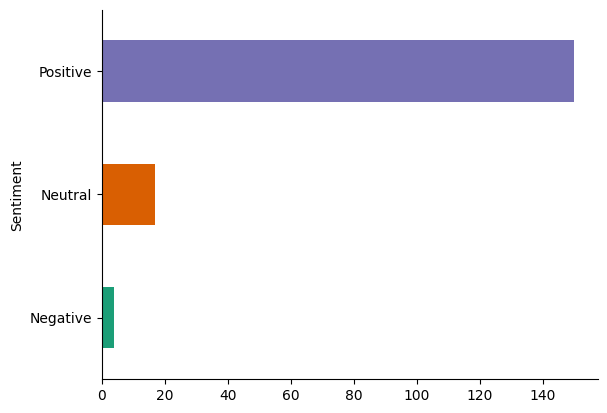

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
review_data.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
pd.set_option('display.max_rows', None)
positive_reviews = review_data[review_data['Sentiment'] == 'Positive']
neutral_negative_reviews = review_data[review_data['Sentiment'].isin(['Neutral', 'Negative'])]
sorted_df = neutral_negative_reviews.sort_values(by=['Sentiment', 'Date'], ascending=[True, True])
sorted_df

,Username,Date,Content,Rating,Sentiment
36,Geoff,06/02/2024,Then person who spoke to was very…Then person ...,5,Negative
90,Anthony,07/01/2024,I was helped through the process by an extreme...,5,Negative
100,Mr,18/01/2024,Cheaper Car InsuranceThe price for this insura...,5,Negative
14,Kevin,20/02/2024,The lady that handled my car insurance…The lad...,5,Negative
111,UMASHANKAR,01/02/2024,Competitive quoteCompetitive quote and a numbe...,5,Neutral
180,MRS,05/02/2024,PricePrice. But still too high!Date of experie...,5,Neutral
184,Alan,05/02/2024,It was stress freeDate of experience: February...,5,Neutral
42,EA,07/02/2024,Let downYou didn’t inform my insurance company...,1,Neutral
145,Mick,08/01/2024,Documents sent by email promptlyDate of experi...,5,Neutral
126,Ian,08/02/2024,no hassle to sort my insuranceDate of experien...,5,Neutral


Visualising Sentiment Over Time

In [17]:
sentiment_over_time = review_data.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

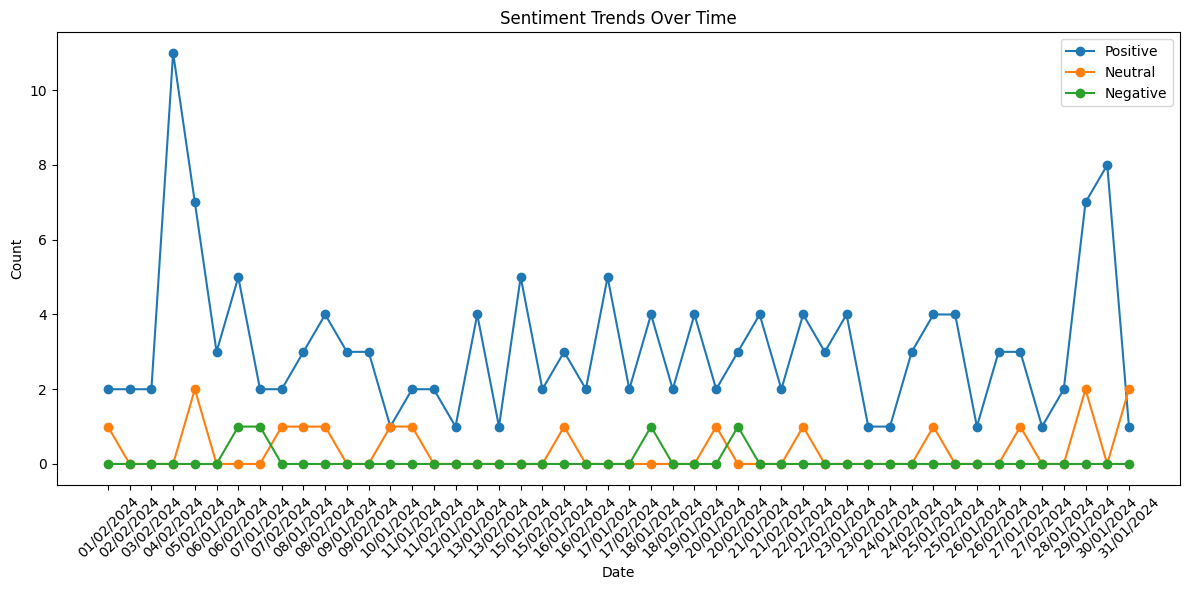

In [18]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time['Positive'], label='Positive', marker='o')
plt.plot(sentiment_over_time.index, sentiment_over_time['Neutral'], label='Neutral', marker='o')
plt.plot(sentiment_over_time.index, sentiment_over_time['Negative'], label='Negative', marker='o')

plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

5. Save file for further analysis on Microsoft Excel

In [ ]:
# Convert the DataFrame to a CSV file and download it
review_data.to_csv('reviews.csv', index=False)
files.download('reviews.csv')